# Ridge Regression on ContextAware and DecadeAware system

In [2]:
library(tidyverse)
library(caret)
library(glmnet)
library(dplyr)
#library(psych) 
set.seed(1991)

In [6]:
CompoundAware_DecadeAware<-read.csv("/data/dharp/compounding/datasets/trial.csv",sep = '\t')

In [7]:
Y <- CompoundAware_DecadeAware %>% select(compound_mean) %>% scale(center = TRUE, scale = FALSE) %>% as.double()
X <- CompoundAware_DecadeAware %>% select(-c(1:8)) %>% as.matrix()

We use Ridge Regression to find a linear relationship between the features (PPMI, Local Mutual Information, Log Likelihood and the three similarity features) and compound_mean from the Reddy dataset for the 80 compounds.

In [8]:
lambda <- 10^seq(-3, 3, length = 100)


In [9]:
ridge <- train(
  compound_mean ~. -modifier -head -modifier_mean -modifier_std -head_mean -head_std -compound_std, 
    data = CompoundAware_DecadeAware, method = "glmnet",
  trControl = trainControl("cv", number = 10,search="grid"),
  tuneGrid = expand.grid(alpha = 0, lambda = lambda)
  )

elastic <- train(
  compound_mean ~. -modifier -head -modifier_mean -modifier_std -head_mean -head_std -compound_std,
    data = CompoundAware_DecadeAware, method = "glmnet",
  trControl = trainControl("cv", number = 10,search="grid"),
  tuneLength = 10
  )

lasso <- train(
  compound_mean ~. -modifier -head -modifier_mean -modifier_std -head_mean -head_std -compound_std,
    data = CompoundAware_DecadeAware, method = "glmnet",
  trControl = trainControl("cv", number = 10,search="grid"),
  tuneGrid = expand.grid(alpha = 1, lambda = lambda)
  )
# Model coefficients
#coef(ridge$finalModel, ridge$bestTune$lambda)
# Make predictions
#predictions <- ridge %>% predict(test.data)
# Model prediction performance
#data.frame(
#  RMSE = RMSE(predictions, test.data$medv),
#  Rsquare = R2(predictions, test.data$medv)
#)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

In [11]:
getTrainPerf(elastic)

TrainRMSE,TrainRsquared,TrainMAE,method
1.186714,0.4302433,1.019241,glmnet


In [10]:
models <- list(ridge = ridge, lasso = lasso, elastic = elastic)
resamples(models) %>% summary( metric = "RMSE")


Call:
summary.resamples(object = ., metric = "RMSE")

Models: ridge, lasso, elastic 
Number of resamples: 10 

RMSE 
             Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
ridge   0.8891465 1.120576 1.227338 1.225745 1.343688 1.570850    0
lasso   0.9992967 1.088216 1.201105 1.215335 1.346212 1.448980    0
elastic 0.8409485 1.071267 1.100541 1.186714 1.336025 1.565506    0


In [12]:
dev.new(width = 550, height = 900, unit = "px")

Variable Importance is used to look at the importance of a feature in predicting compound_mean. We show the top 20 features out of the possible 126 (21 decades * 6 features).

When we look at the features irrespective of the decade,

log ratio is the most important and occupies 11/20 positions with local mutual information in the other 9. 

We do not see any of the similarity features being as important as the information theory based features. 

(This is good because previous studies only looked at similarity and frequencies, but never information theory features)

Given below is the distribution of the variables that were deemed important based on the decade

1800 : 1

1830 : 2

1840 : 2

1850 : 2

1860 : 2

1870 : 2

1880 : 2

1890 : 2

1900 : 2

1910 : 2

1920 : 1

( We need to figure out how and if the decade information makes any sense)

When we compare this model with the non temporal model, we get better R squared values, so we can say that temporal information is helping us predict the compositionality score.

In [13]:
varImp(elastic)

glmnet variable importance

  only 20 most important variables shown (out of 120)

                           Overall
X1810_sim_with_head       100.0000
X1930_sim_with_head        33.8189
X1930_sim_with_modifier    28.8823
X1980_local_mi             22.0961
X1980_ppmi                 20.0171
X1990_local_mi             16.6332
X1990_ppmi                 15.8334
X1920_sim_with_modifier    14.4443
X1980_log_ratio            13.1343
X1870_log_ratio            11.6380
X1810_log_ratio            10.7671
X1940_sim_with_modifier     8.4858
X1990_log_ratio             8.3887
X1930_local_mi              7.6360
X1930_ppmi                  6.1996
X1980_sim_bw_constituents   3.1620
X1880_local_mi              3.0653
X1880_ppmi                  2.4100
X1950_sim_with_modifier     1.4416
X1810_local_mi              0.6743

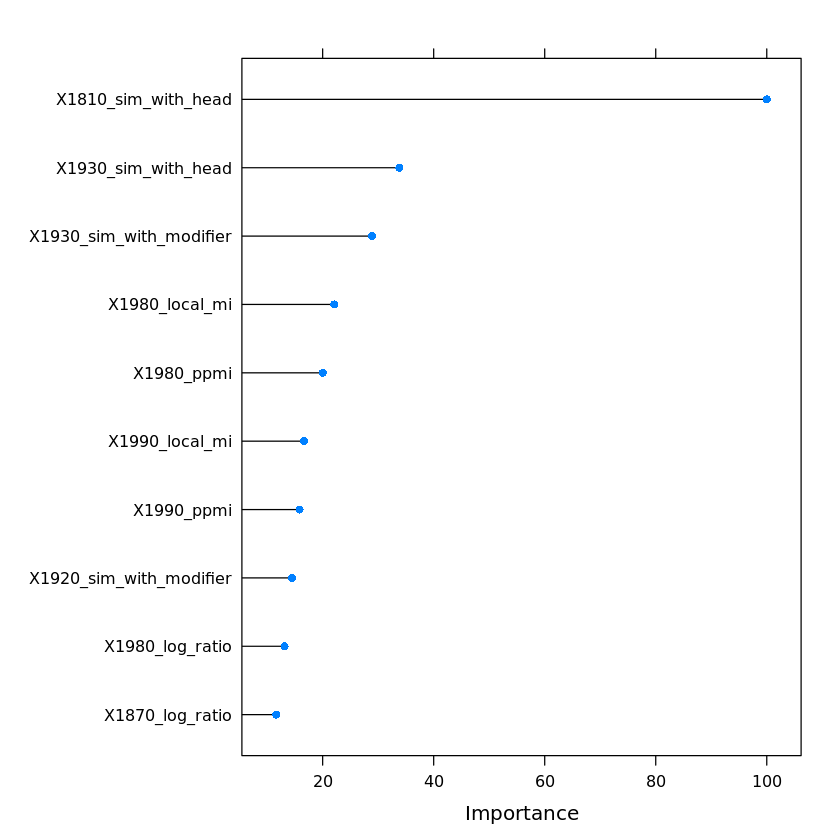

In [14]:
plot(varImp(elastic),top=10)